
## **Web scraping**

In [1]:
import requests               
from bs4 import BeautifulSoup 
import pandas as pd              

Details regarding the scraping

Saving the data in CSV file

In [2]:
!pip install fake_useragent

In [19]:
from fake_useragent import UserAgent
user_agent = UserAgent()

data = []

for page_no in range(1, 38):
    url = 'https://www.amazon.in/s?i=electronics&bbn=1389401031&rh=n%3A1389401031%2Cp_89%3ARedmi%7CSamsung&dc&page=3&qid=1611370061&rnid=3837712031&ref=sr_pg_' + str(page_no)
    page = requests.get(url,headers={'user-agent':user_agent.chrome})
    soup = BeautifulSoup(page.content, 'html.parser')

    name = soup.select('.a-color-base.a-text-normal')
    price = soup.select('.a-price-whole')
    rating = soup.select('span.a-icon-alt')
    for i in range(len(name)):
        
        if 'redmi' in name[i].get_text().lower(): 
            manufacturer = 'redmi'
        elif 'samsung' in name[i].get_text().lower():
            manufacturer = 'samsung'
        else:
            manufacturer = 'NA'
        data.append([name[i].get_text(), price[i].get_text(),rating[i].get_text().split(' ')[0], manufacturer])

In [20]:
import pandas as pd
df = pd.DataFrame(data, columns=["name", "price", "rating", "Manufacturer"])
df.to_csv('data.csv', index=False)

## **EDA**

In [ ]:
df = pd.read_csv('data.csv')

In [21]:
grouped = df.groupby(df.Manufacturer) 
df_redmi = grouped.get_group("redmi")
df_samsung = grouped.get_group("samsung") 


In [22]:
def price_range(df):
    class1 = 0 
    class2 = 0
    class3 = 0

    for i in range(len(df)):
        price = df.iloc[i, 1].replace(',', '')
        rating = df.iloc[i, 2]
        manufacturer = df.iloc[i, 3]
        price = int(price)
        if price > 1000 and price < 5000:
            class1 += 1
        elif price >= 5000 and price < 10000:
            class2 += 1
        elif price >= 10000:
            class3 += 1 
        else:
            pass
    return [class1, class2, class3]


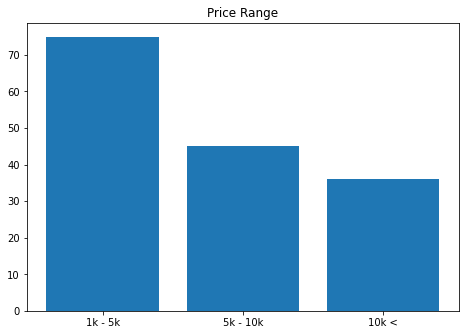

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['1k - 5k', '5k - 10k', '10k <']
y = price_range(df_samsung)
ax.bar(x,y)
plt.title('Price Range')
plt.show()

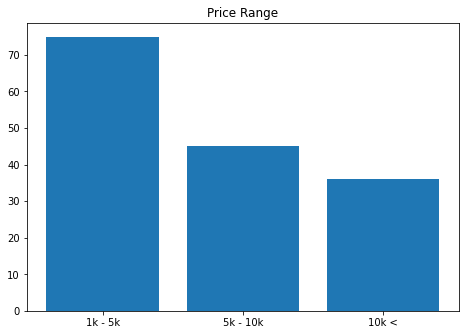

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['1k - 5k', '5k - 10k', '10k <']
y = price_range(df_samsung)
ax.bar(x,y)
plt.title('Price Range')
plt.show()

In [25]:
df_redmi

,name,price,rating,Manufacturer
4,"Redmi 20000mAh Li-Polymer Power Bank (Black), ...","1,199",4.4,redmi
5,"Redmi Earbuds S (with Gaming Mode), Up to 12 H...","1,299",3.4,redmi
6,"Redmi Note 9 Pro Max (Champagne Gold, 6GB RAM,...","14,999",4.4,redmi
7,"Redmi Note 9 (Pebble Grey, 4GB RAM 64GB Storag...","11,999",4.2,redmi
10,Redmi 10000 mAh Fast Charging Slim Power Bank ...,699,4.1,redmi
...,...,...,...,...
354,"Redmi Note 9 Pro Max (Champagne Gold, 6GB RAM,...","17,499",4.1,redmi
356,"Redmi 9 Prime (Sunrise Flare, 4GB RAM, 128GB S...","10,999",4.2,redmi
357,"Redmi 9 Prime (Matte Black, 4GB RAM, 128GB Sto...","10,999",4.1,redmi
359,"Redmi Note 9 (Pebble Grey, 6GB RAM 128GB Stora...","13,999",4.2,redmi


In [26]:
df_samsung

,name,price,rating,Manufacturer
0,"Samsung Galaxy M51 (Celestial Black, 6GB RAM, ...","22,999",4,samsung
1,"Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB ...","5,999",3,samsung
2,Samsung EVO Plus 128GB microSDXC UHS-I U3 100M...,"1,329",2,samsung
3,"Samsung Galaxy M21 (Raven Black, 6GB RAM, 128G...","14,499",1,samsung
8,"Samsung Galaxy M31s (Mirage Black, 8GB RAM, 12...","19,999",4.1,samsung
...,...,...,...,...
360,"Samsung Galaxy M01 Core (Blue, 1GB RAM, 16GB S...","4,999",4.2,samsung
361,"Samsung Guru Music 2 (SM-B310E, Black)","1,900",4.2,samsung
362,Samsung EVO Plus 32GB microSDHC UHS-I U1 95MB/...,419,3.4,samsung
364,Samsung EHS64 EHS64AVFWECINU Wired Stereo Head...,399,4.4,samsung


In [30]:

grouped = df_redmi.groupby(df_redmi.rating) 
print('Best rating ', df_redmi.max()[2])
print(grouped.get_group(df_redmi.max()[2]).iloc[:,0].values)

Best rating  4.4
['Redmi 20000mAh Li-Polymer Power Bank (Black), USB Type C and Micro USB Ports | 18W Fast Charging'
 'Redmi Note 9 Pro Max (Champagne Gold, 6GB RAM, 64GB Storage) - 64MP Quad Camera & Latest 8nm Snapdragon 720G & Alexa Hands-Free | Upto 12 Months No Cost EMI |Extra INR 1000 Off with Coupons'
 'Redmi Note 9 Pro Max (Champagne Gold, 6GB RAM, 64GB Storage) - 64MP Quad Camera & Latest 8nm Snapdragon 720G & Alexa Hands-Free | Upto 12 Months No Cost EMI |Extra INR 1000 Off with Coupons'
 'Redmi Note 9 Pro Max (Champagne Gold, 6GB RAM, 64GB Storage) - 64MP Quad Camera & Latest 8nm Snapdragon 720G & Alexa Hands-Free | Upto 12 Months No Cost EMI |Extra INR 1000 Off with Coupons'
 'Redmi Note 9 Pro Max (Champagne Gold, 6GB RAM, 64GB Storage) - 64MP Quad Camera & Latest 8nm Snapdragon 720G & Alexa Hands-Free | Upto 12 Months No Cost EMI |Extra INR 1000 Off with Coupons'
 'Redmi 20000mAh Li-Polymer Power Bank (Black), USB Type C and Micro USB Ports | 18W Fast Charging'
 'Redmi Not

In [29]:

grouped = df_samsung.groupby(df_samsung.rating)
print('Best rating ', df_samsung.max()[2])
print(grouped.get_group(df_samsung.max()[2]).iloc[:,0].values)

Best rating  4.4
['Samsung Original Level U Bluetooth Wireless in-Ear Headphones (Black and Sapphire)'
 'Samsung Original Level U Bluetooth Wireless in-Ear Headphones (Black and Sapphire)'
 'Samsung Original Level U Bluetooth Wireless in-Ear Headphones (Black and Sapphire)'
 'Samsung Original Level U Bluetooth Wireless in-Ear Headphones (Black and Sapphire)'
 'Samsung Original Level U Bluetooth Wireless in-Ear Headphones (Black and Sapphire)'
 'Samsung Original Level U Bluetooth Wireless in-Ear Headphones (Black and Sapphire)'
 'Samsung Original Level U Bluetooth Wireless in-Ear Headphones (Black and Sapphire)'
 'Samsung EHS64 EHS64AVFWECINU Wired Stereo Headset (White)'
 'Samsung Original Level U Bluetooth Wireless in-Ear Headphones (Black and Sapphire)'
 'Samsung Original Level U Bluetooth Wireless in-Ear Headphones (Black and Sapphire)'
 'Samsung Original Level U Bluetooth Wireless in-Ear Headphones (Black and Sapphire)'
 'Samsung EHS64 EHS64AVFWECINU Wired Stereo Headset (White)'
 